In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-2-cnu-mlclass2/submission.csv
/kaggle/input/2022-2-cnu-mlclass2/train.csv
/kaggle/input/2022-2-cnu-mlclass2/test/test_2110.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_2114.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1743.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_262.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_2125.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1499.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1259.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_422.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_636.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1395.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1800.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_2207.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1391.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_828.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_1546.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_98.jpg
/kaggle/input/2022-2-cnu-mlclass2/test/test_2239.jpg
/kaggle/inpu

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import glob
import seaborn as sns
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from  tensorflow.keras.preprocessing import image

In [3]:
base_path = '/kaggle/input/2022-2-cnu-mlclass2'

train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

In [4]:
train_df.label.value_counts()

cake             1184
pasta            1072
steak            1048
fried_chicken    1034
pizza             963
grilled_eel       951
ramen             881
pork_cutlet       869
janchi_guksu      856
tteokbokki        841
jajangmyeon       833
pork_belly        789
Name: label, dtype: int64

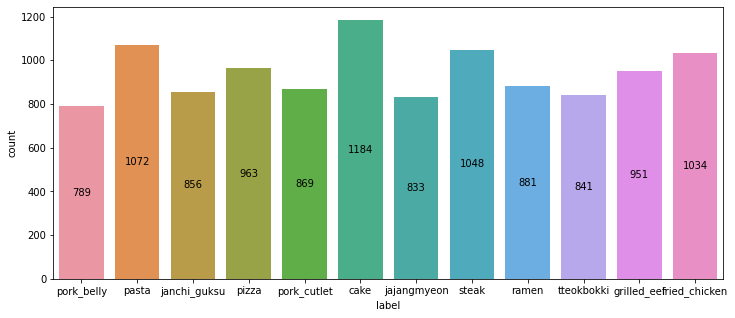

In [5]:
figure = plt.figure(figsize=(12, 5))
ax = figure.add_subplot()
sns.countplot(data=train_df, x='label', ax=ax)

for patch in ax.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax.text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')
    
plt.show()

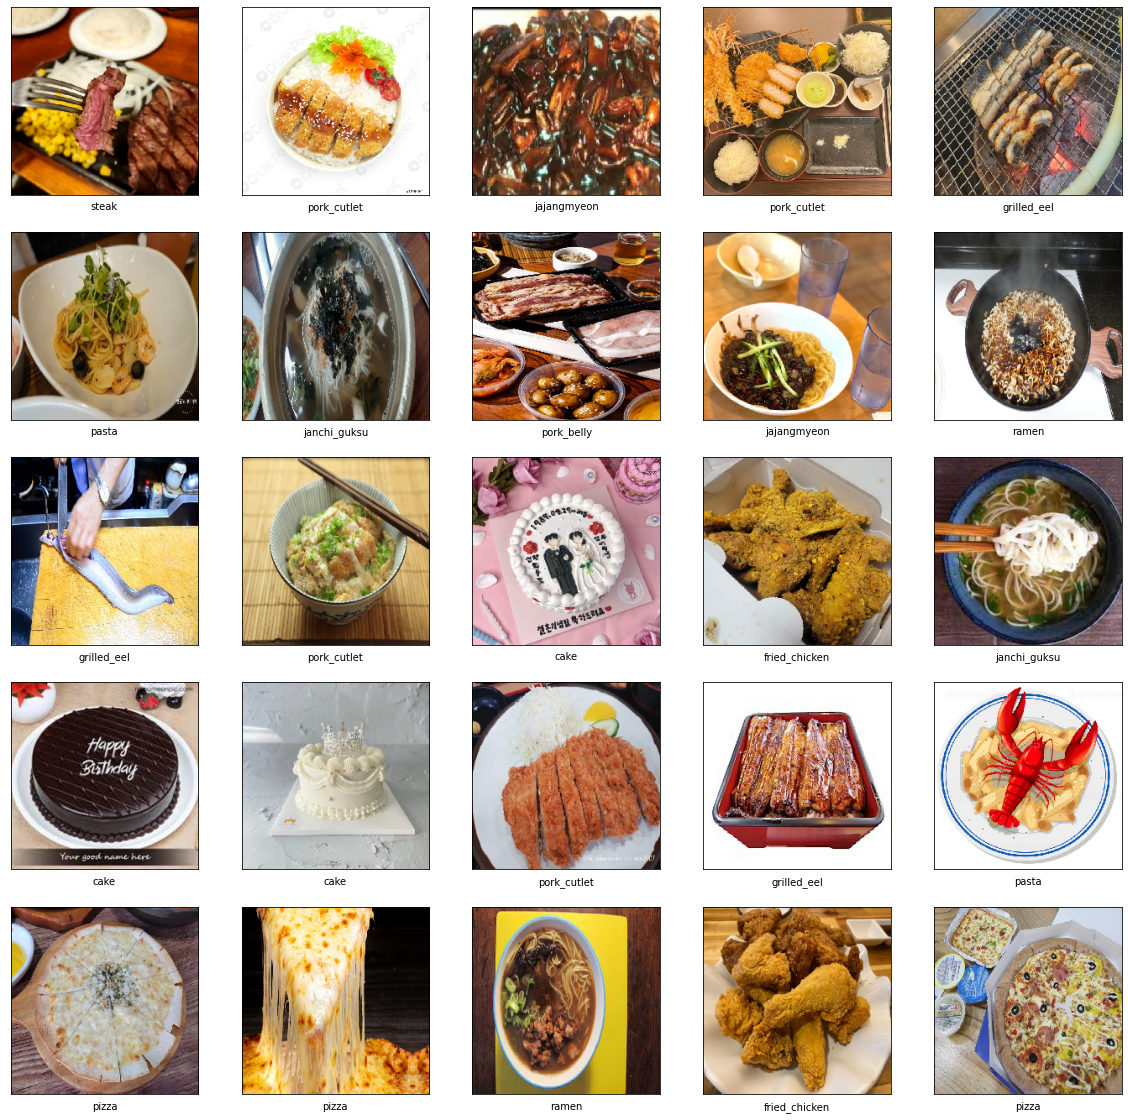

In [6]:
path = os.path.join(base_path, 'train')

plt.figure(figsize=(20,20))
index = np.random.randint(len(train_df), size=25)
for i in range(25):
    label = train_df['label'][index[i]]
    path_img = train_df['image'][index[i]]
    path_img = os.path.join(path, os.path.join(label, path_img))
    
    img = image.load_img(path_img,target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_df, test_size=0.1, stratify=train_df['label'])
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

In [8]:
cls = lambda x : os.path.join(path, '_'.join(x.split('_')[1:-1])+'/'+x)
train['image'] = train['image'].map(lambda x : cls(x))
train.head(10)

image          label
0  /kaggle/input/2022-2-cnu-mlclass2/train/cake/n...           cake
1  /kaggle/input/2022-2-cnu-mlclass2/train/ramen/...          ramen
2  /kaggle/input/2022-2-cnu-mlclass2/train/pasta/...          pasta
3  /kaggle/input/2022-2-cnu-mlclass2/train/pizza/...          pizza
4  /kaggle/input/2022-2-cnu-mlclass2/train/cake/g...           cake
5  /kaggle/input/2022-2-cnu-mlclass2/train/fried_...  fried_chicken
6  /kaggle/input/2022-2-cnu-mlclass2/train/janchi...   janchi_guksu
7  /kaggle/input/2022-2-cnu-mlclass2/train/cake/g...           cake
8  /kaggle/input/2022-2-cnu-mlclass2/train/fried_...  fried_chicken
9  /kaggle/input/2022-2-cnu-mlclass2/train/steak/...          steak

In [9]:
valid['image'] = valid['image'].map(lambda x : cls(x))
valid.head(10)

image        label
0  /kaggle/input/2022-2-cnu-mlclass2/train/pasta/...        pasta
1  /kaggle/input/2022-2-cnu-mlclass2/train/cake/g...         cake
2  /kaggle/input/2022-2-cnu-mlclass2/train/grille...  grilled_eel
3  /kaggle/input/2022-2-cnu-mlclass2/train/ramen/...        ramen
4  /kaggle/input/2022-2-cnu-mlclass2/train/tteokb...   tteokbokki
5  /kaggle/input/2022-2-cnu-mlclass2/train/ramen/...        ramen
6  /kaggle/input/2022-2-cnu-mlclass2/train/pizza/...        pizza
7  /kaggle/input/2022-2-cnu-mlclass2/train/pork_b...   pork_belly
8  /kaggle/input/2022-2-cnu-mlclass2/train/pizza/...        pizza
9  /kaggle/input/2022-2-cnu-mlclass2/train/ramen/...        ramen

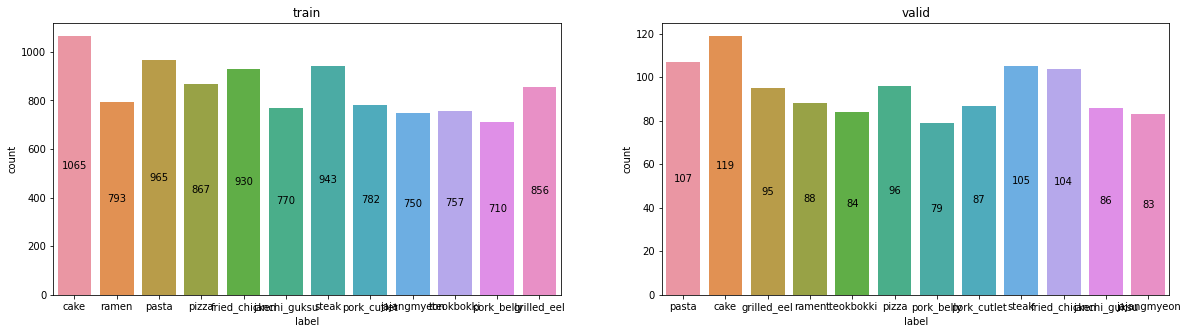

In [10]:
figure, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(data=train, x='label', ax=ax[0])
sns.countplot(data=valid, x='label', ax=ax[1])

ax[0].set_title('train')
for patch in ax[0].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax[0].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

ax[1].set_title('valid')
for patch in ax[1].patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    text_msg = str(int(patch.get_height())) 
    ax[1].text(label_x, label_y, text_msg, horizontalalignment='center', verticalalignment='center')

plt.show()

In [13]:
height, width, channel = (224, 224, 3)
batch_size = 32
labels = train.label.unique().tolist()

train_datagen= ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              zoom_range=[0.7, 1],
                              horizontal_flip=True,
                              vertical_flip=False,
                              fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = './train',
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))


Found 10188 validated image filenames belonging to 12 classes.


In [15]:
valid_datagen = ImageDataGenerator(rescale=1. / 255.)

valid_generator = valid_datagen.flow_from_dataframe(valid,
                                                   directory = './train',
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(height, width))

Found 1133 validated image filenames belonging to 12 classes.


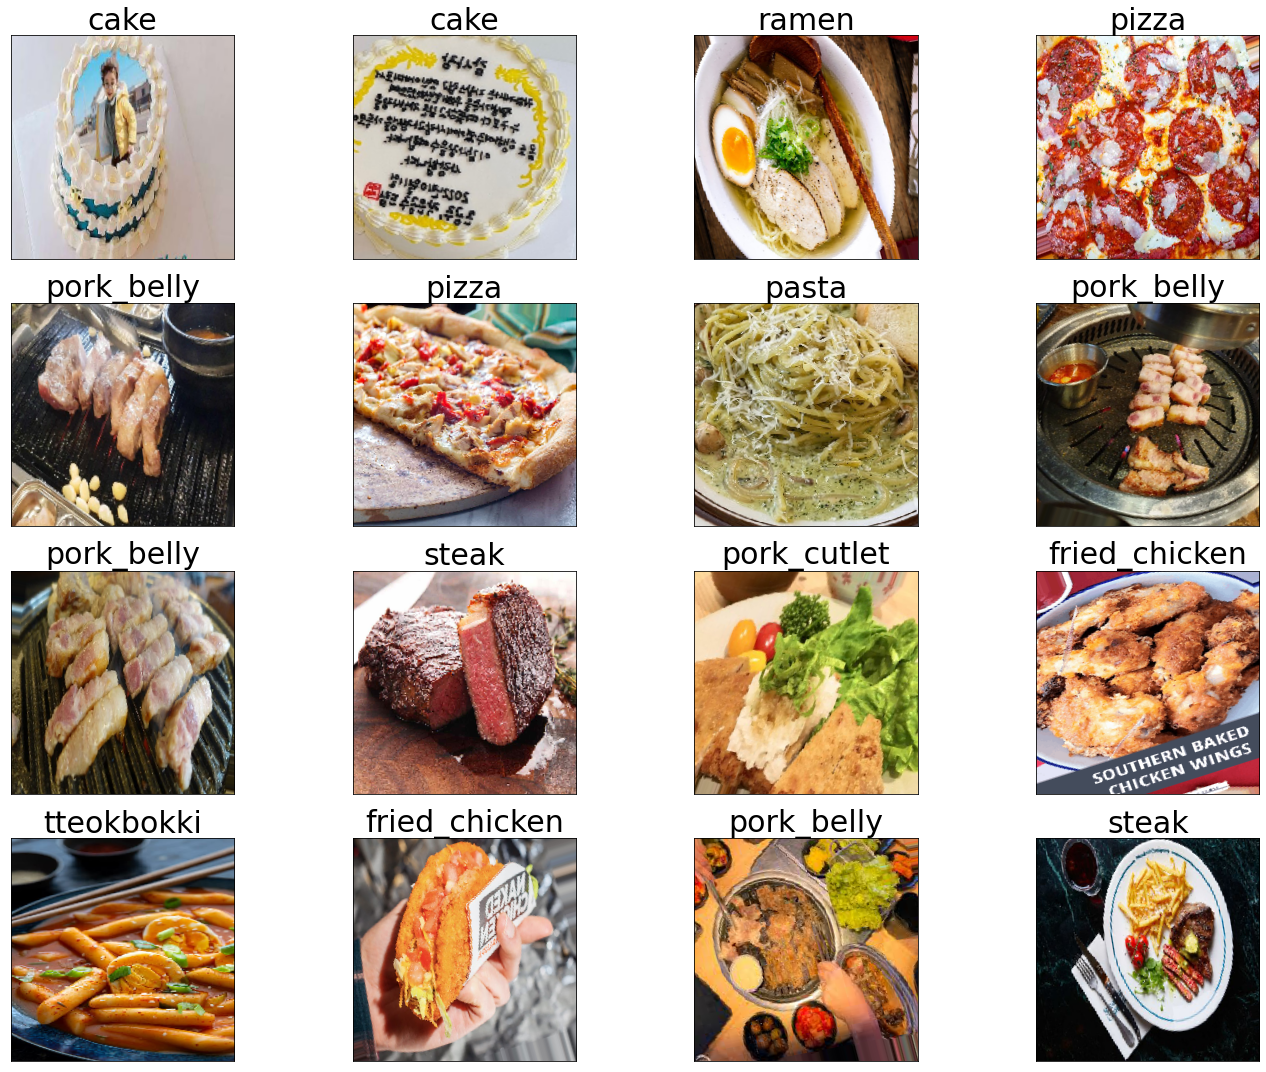

In [16]:
pred2label={}
for x in train_generator.class_indices.keys():
    pred2label[train_generator.class_indices[x]] = x


plt.figure(figsize=(20,15))
index = np.random.randint(len(train_df), size=batch_size)
x_augs, y_augs = train_generator.next()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_augs[i, :, :, :])
    plt.title(pred2label[np.argmax(y_augs[i, :])], fontsize=30)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()
plt.show()

In [11]:
import tensorflow

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Resizing
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=256, kernel_size=3,activation="relu", input_shape=(height, width, channel)))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=512, activation="relu"))
cnn_model.add(Dropout(0.15))
cnn_model.add(Dense(units=len(labels), activation="softmax"))

2022-11-23 16:14:05.678363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:14:05.777736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:14:05.778587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:14:05.780333: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [14]:
stop = EarlyStopping(patience=5)

# 자동 저장
checkpoint = ModelCheckpoint("best_model/model_weights",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1,save_best_only=True)
callbacks = [stop, checkpoint]

# 모델 컴파일
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
cnn_history = cnn_model.fit(train_generator,
                            validation_data=valid_generator,
                            callbacks=callbacks,
                            verbose=2,
                            epochs=20)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
2022-11-23 16:14:25.332498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-11-23 16:14:27.942254: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


319/319 - 319s - loss: 2.2980 - accuracy: 0.2224 - val_loss: 2.1099 - val_accuracy: 0.3160

Epoch 00001: val_accuracy improved from -inf to 0.31598, saving model to best_model/model_weights
Epoch 2/20
319/319 - 241s - loss: 1.8974 - accuracy: 0.3587 - val_loss: 1.8026 - val_accuracy: 0.3883

Epoch 00002: val_accuracy improved from 0.31598 to 0.38835, saving model to best_model/model_weights
Epoch 3/20
319/319 - 241s - loss: 1.7014 - accuracy: 0.4411 - val_loss: 1.6069 - val_accuracy: 0.4625

Epoch 00003: val_accuracy improved from 0.38835 to 0.46249, saving model to best_model/model_weights
Epoch 4/20
319/319 - 242s - loss: 1.5717 - accuracy: 0.4777 - val_loss: 1.5792 - val_accuracy: 0.4837

Epoch 00004: val_accuracy improved from 0.46249 to 0.48367, saving model to best_model/model_weights
Epoch 5/20
319/319 - 241s - loss: 1.4822 - accuracy: 0.5150 - val_loss: 1.5236 - val_accuracy: 0.4916

Epoch 00005: val_accuracy improved from 0.48367 to 0.49162, saving model to best_model/model_we

In [16]:
cnn_model.load_weights('./best_model/model_weights')

In [17]:
test_df = pd.read_csv(os.path.join(base_path, "./submission.csv"))
test_df.head(5)

image  label
0  test_1553.jpg    NaN
1  test_2202.jpg    NaN
2  test_1556.jpg    NaN
3   test_660.jpg    NaN
4   test_677.jpg    NaN

In [21]:
batch_size = len(test_df["image"])
height, width, channel = 224, 224, 3

path =  os.path.join(base_path, 'test')

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    test_image[i] = img_tensor
    
predictions = cnn_model.predict(test_image)

test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
test_df

image          label
0     test_1553.jpg          ramen
1     test_2202.jpg    jajangmyeon
2     test_1556.jpg    pork_cutlet
3      test_660.jpg          pizza
4      test_677.jpg          ramen
...             ...            ...
2761  test_2189.jpg    jajangmyeon
2762   test_223.jpg  fried_chicken
2763   test_303.jpg          ramen
2764  test_1681.jpg   janchi_guksu
2765   test_777.jpg           cake

[2766 rows x 2 columns]

In [22]:
test_df.to_csv('./submission_baseline.csv', index=False)

# mobile net

In [23]:
import tensorflow as tf
from tensorflow import keras

mobile_net=tf.keras.applications.mobilenet.MobileNet()
mobile_net.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [24]:
model=keras.Sequential()
for layer in mobile_net.layers[:-1]:
  model.add(layer)

In [25]:
for layer in model.layers:
  layer.trainable=False

In [26]:
model.add(tf.keras.layers.Dense(12,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch = 10188 ,
    validation_data = valid_generator,
    validation_steps = 1133 # BATCH_SIZE
)

Epoch 1/25
   19/10188 [..............................] - ETA: 2:17:26 - loss: 4.3036 - accuracy: 0.2171

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10188/10188 [==============================] - 291s 28ms/step - loss: 1.3540 - accuracy: 0.6642 - val_loss: 0.8179 - val_accuracy: 0.7714


In [18]:
test_df = pd.read_csv(os.path.join(base_path, "./submission.csv"))
test_df.head(5)

image  label
0  test_1553.jpg    NaN
1  test_2202.jpg    NaN
2  test_1556.jpg    NaN
3   test_660.jpg    NaN
4   test_677.jpg    NaN

In [19]:
batch_size = len(test_df["image"])
height, width, channel = 255, 255, 3

In [20]:
path =  os.path.join(base_path, 'test')

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    test_image[i] = img_tensor

(2766, 255, 255, 3)


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [32]:
predictions= model.predict(test_image)
test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
test_df

2022-11-23 17:54:21.078461: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1680345000 exceeds 10% of free system memory.
2022-11-23 17:54:22.980672: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1680345000 exceeds 10% of free system memory.


image          label
0     test_1553.jpg     tteokbokki
1     test_2202.jpg          ramen
2     test_1556.jpg          pizza
3      test_660.jpg          pizza
4      test_677.jpg          pasta
...             ...            ...
2761  test_2189.jpg          ramen
2762   test_223.jpg  fried_chicken
2763   test_303.jpg   janchi_guksu
2764  test_1681.jpg   janchi_guksu
2765   test_777.jpg           cake

[2766 rows x 2 columns]

In [33]:
test_df.to_csv('./submission_mobilenet.csv', index=False)

# 다시 vggnet16

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [22]:
base_model = VGG16(weights='imagenet', include_top=False,
                            input_shape=(255, 255,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096,activation="relu")(x)
x = Dense(4096,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(2096,activation="relu")(x)
predictions = Dense(12, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

2022-11-23 19:04:41.304538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 19:04:41.397233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 19:04:41.398007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 19:04:41.399868: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 255, 255, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 255, 255, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 255, 255, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [24]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

In [25]:
opt = Adam(learning_rate=0.005)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [26]:
history=model.fit(train_generator,
                  epochs=50,
                  validation_data=valid_generator,
                  validation_steps=int(0.1 * len(valid_generator)),
                  verbose=1,
                  callbacks=callbacks)

2022-11-23 19:04:45.243309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-23 19:04:48.299319: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


319/319 [==============================] - 305s 922ms/step - loss: 2.6038 - accuracy: 0.3120 - val_loss: 1.6381 - val_accuracy: 0.4375
Epoch 2/50
319/319 [==============================] - 234s 735ms/step - loss: 1.5747 - accuracy: 0.4755 - val_loss: 1.3460 - val_accuracy: 0.6146
Epoch 3/50
319/319 [==============================] - 234s 735ms/step - loss: 1.4801 - accuracy: 0.5103 - val_loss: 1.3808 - val_accuracy: 0.5208
Epoch 4/50
319/319 [==============================] - 233s 732ms/step - loss: 1.4535 - accuracy: 0.5175 - val_loss: 1.4758 - val_accuracy: 0.5208
Epoch 5/50
319/319 [==============================] - 234s 731ms/step - loss: 1.4086 - accuracy: 0.5369 - val_loss: 1.2337 - val_accuracy: 0.6354
Epoch 6/50
319/319 [==============================] - 233s 730ms/step - loss: 1.3655 - accuracy: 0.5594 - val_loss: 1.2069 - val_accuracy: 0.6458
Epoch 7/50
319/319 [==============================] - 233s 730ms/step - loss: 1.3361 - accuracy: 0.5678 - val_loss: 1.3045 - val_accura

In [27]:
model.predict(test_image)
# test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
# test_df

2022-11-23 20:23:26.030887: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2158309800 exceeds 10% of free system memory.
2022-11-23 20:23:28.990616: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2158309800 exceeds 10% of free system memory.


array([[1.15460753e-01, 3.59021485e-01, 3.08876723e-01, ...,
        8.46303523e-01, 1.31168976e-01, 6.66670263e-01],
       [1.57389641e-02, 6.42285824e-01, 3.66486996e-01, ...,
        7.89945841e-01, 7.94868693e-02, 6.45704210e-01],
       [6.81665540e-02, 7.12544799e-01, 2.65503883e-01, ...,
        3.62565428e-01, 4.81003255e-01, 4.16623592e-01],
       ...,
       [2.91092671e-03, 2.36752983e-02, 2.05990002e-02, ...,
        9.27074969e-01, 1.63526207e-01, 5.37126660e-02],
       [4.30385553e-04, 9.22318082e-03, 5.19546680e-02, ...,
        9.31864619e-01, 1.24033794e-01, 4.35195453e-02],
       [9.78647947e-01, 2.93112602e-02, 2.85069495e-01, ...,
        1.23974316e-01, 7.78639257e-01, 1.22270256e-01]], dtype=float32)

In [28]:
test_df.to_csv('./submission_vggnet16.csv', index=False)

## 다시

In [16]:
# TRAINING_DIR = train_path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.2,
    zoom_range = 0.2
)
train_generator = train_datagen.flow_from_dataframe(train,
                                                   directory = './train',
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(255, 255))

Found 10188 validated image filenames belonging to 12 classes.


In [19]:
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)
valid_generator = validation_datagen.flow_from_dataframe(valid,
                                                   directory = './train',
                                                   x_col='image',
                                                   y_col='label',
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   color_mode= 'rgb',
                                                   target_size=(255, 255))

Found 1133 validated image filenames belonging to 12 classes.


In [21]:
BATCH_SIZE = 32
IMG_HEIGHT = 255
IMG_WIDTH = 255
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
EPOCHS = 10
INIT_LR = 1e-3

CLASS_NAMES = np.array([item for item in os.listdir(path)])
print (CLASS_NAMES)

['pork_cutlet' 'janchi_guksu' 'fried_chicken' 'grilled_eel' 'ramen'
 'pasta' 'pork_belly' 'steak' 'jajangmyeon' 'tteokbokki' 'pizza' 'cake']


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2,InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

def define_model(n_layers=150,BASE_MODEL='ResNet50V2'):
    if BASE_MODEL =='ResNet50V2':
        # Pre-trained model with MobileNetV2
        base_model = ResNet50V2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=False
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.2)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
    
    if BASE_MODEL =='InceptionV3':
        base_model = InceptionV3(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
        head_model = base_model
        for layers in base_model.layers[:n_layers]:
            layers.trainable=False
        
        head_model = head_model.output
        head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(1024,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.5)(head_model)
        prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
    return model

# define Model 
model= define_model(BASE_MODEL='InceptionV3')

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(lr=0.01), 
    metrics=['accuracy'])

In [27]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 127, 127, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 127, 127, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [29]:
history = model.fit(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=valid_generator)

2022-12-05 14:32:00.049199: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-12-05 14:32:06.251026: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 24/510 [>.............................] - ETA: 4:52 - loss: 26.5067 - accuracy: 0.0854

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


510/510 [==============================] - 341s 646ms/step - loss: 5.6881 - accuracy: 0.0990 - val_loss: 2.4790 - val_accuracy: 0.1130
Epoch 2/25
510/510 [==============================] - 283s 556ms/step - loss: 2.5310 - accuracy: 0.1090 - val_loss: 2.4769 - val_accuracy: 0.1050
Epoch 3/25
510/510 [==============================] - 283s 555ms/step - loss: 2.4921 - accuracy: 0.1081 - val_loss: 2.4762 - val_accuracy: 0.1050
Epoch 4/25
510/510 [==============================] - 285s 559ms/step - loss: 2.4907 - accuracy: 0.1099 - val_loss: 2.4762 - val_accuracy: 0.1050
Epoch 5/25
510/510 [==============================] - 285s 558ms/step - loss: 2.4432 - accuracy: 0.1299 - val_loss: 2.2786 - val_accuracy: 0.1959
Epoch 6/25
510/510 [==============================] - 283s 555ms/step - loss: 2.2715 - accuracy: 0.1652 - val_loss: 2.1377 - val_accuracy: 0.1818
Epoch 7/25
510/510 [==============================] - 280s 550ms/step - loss: 2.0961 - accuracy: 0.2022 - val_loss: 1.8650 - val_accura

In [ ]:
test_df = pd.read_csv(os.path.join(base_path, "./submission.csv"))
test_df.head(5)

batch_size = len(test_df["image"])
height, width, channel = 255, 255, 3

path =  os.path.join(base_path, 'test')

test_image = np.zeros((batch_size, height, width, channel))
print(test_image.shape)
cnt=0
for i in range(len(test_df["image"])):
    path_img = test_df['image'][i]
    img = image.load_img(os.path.join(path,path_img), target_size=(height, width))
    img_tensor = image.img_to_array(img)
    img_tensor = np.array(img_tensor,dtype="float32")

    img_tensor /= 255
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    test_image[i] = img_tensor
 



predictions= model.predict(test_image)
test_df['label'] = [pred2label[np.argmax(pred)] for pred in predictions]
test_df

(2766, 255, 255, 3)


In [ ]:
test_df.to_csv('./submission_restnet50.csv', index=False)